# Tutorial 6: Portfolio Optimization with Custom Parameters

## 1. Downloading the data:

| 티커 | 설명 |
|------|------|
| **IEUR** | iShares MSCI Europe ETF: 유럽 시장의 대형주 및 중형주를 추종하는 ETF로, MSCI Europe Index를 기반으로 합니다. |
| **IPAC** | iShares MSCI Pacific ETF: 태평양 지역(일본, 호주, 홍콩 등)의 대형주 및 중형주를 추종하는 ETF로, MSCI Pacific Index를 기반으로 합니다. |
| **IVV** | iShares Core S&P 500 ETF: S&P 500 Index를 추종하는 ETF로, 미국 대형주의 성과를 반영합니다. |
| **EWC** | iShares MSCI Canada ETF: 캐나다 주식을 추종하는 ETF로, MSCI Canada Index를 기반으로 합니다. |
| **SCZ** | iShares MSCI EAFE Small-Cap ETF: 유럽, 아시아 및 오세아니아의 소형주를 추종하는 ETF로, MSCI EAFE Small Cap Index를 기반으로 합니다. |
| **IJR** | iShares Core S&P Small-Cap ETF: S&P SmallCap 600 Index를 추종하는 ETF로, 미국 소형주의 성과를 반영합니다. |
| **XCS.TO** | iShares S&P/TSX SmallCap Index ETF: 캐나다 소형주를 추종하는 ETF로, S&P/TSX SmallCap Index를 기반으로 합니다. |
| **EIMI.L** | iShares MSCI Emerging Markets IMI UCITS ETF: 신흥 시장의 주식을 추종하는 ETF로, MSCI Emerging Markets Investable Market Index (IMI)를 기반으로 합니다. |


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets =  ['IEUR', 'IPAC', 'IVV', 'EWC', 'SCZ', 'IJR', 'XCS.TO', 'EIMI.L']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  8 of 8 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
Date,,,,,,,,
2016-01-05,0.8804%,-0.4719%,-0.6499%,0.3068%,0.5109%,0.2079%,-0.2627%,-0.2423%
2016-01-06,-1.1807%,-2.1811%,-1.7441%,-1.1403%,-1.9695%,-1.3091%,-1.6819%,-0.6478%
2016-01-07,-1.9740%,-2.3752%,-1.6741%,-2.5694%,-2.0955%,-2.3928%,-1.5251%,-2.4450%
2016-01-08,-2.0668%,-0.4469%,-1.0556%,-1.6651%,-1.4784%,-1.1077%,-1.3395%,0.0836%
2016-01-11,-0.7576%,-1.3466%,0.1520%,0.0098%,0.1792%,0.1037%,0.1697%,-3.6728%


## 2. Estimating Mean Variance Portfolios with Custom Parameters

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Load our custom estimates of input parameters
custom_mu = pd.read_excel('custom_posterior_mu.xlsx', engine='openpyxl', index_col=0).T
custom_cov = pd.read_excel('custom_posterior_cov.xlsx', engine='openpyxl', index_col=0)

# Input manually the custom parameters:
port.mu = custom_mu / 100 # Custom mean vector.
port.cov = custom_cov / 100 # Custom covariance matrix.

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
weights,1.0452%,16.4387%,44.3880%,8.0941%,0.0005%,0.0000%,0.0001%,30.0334%


### 2.2 Plotting portfolio composition

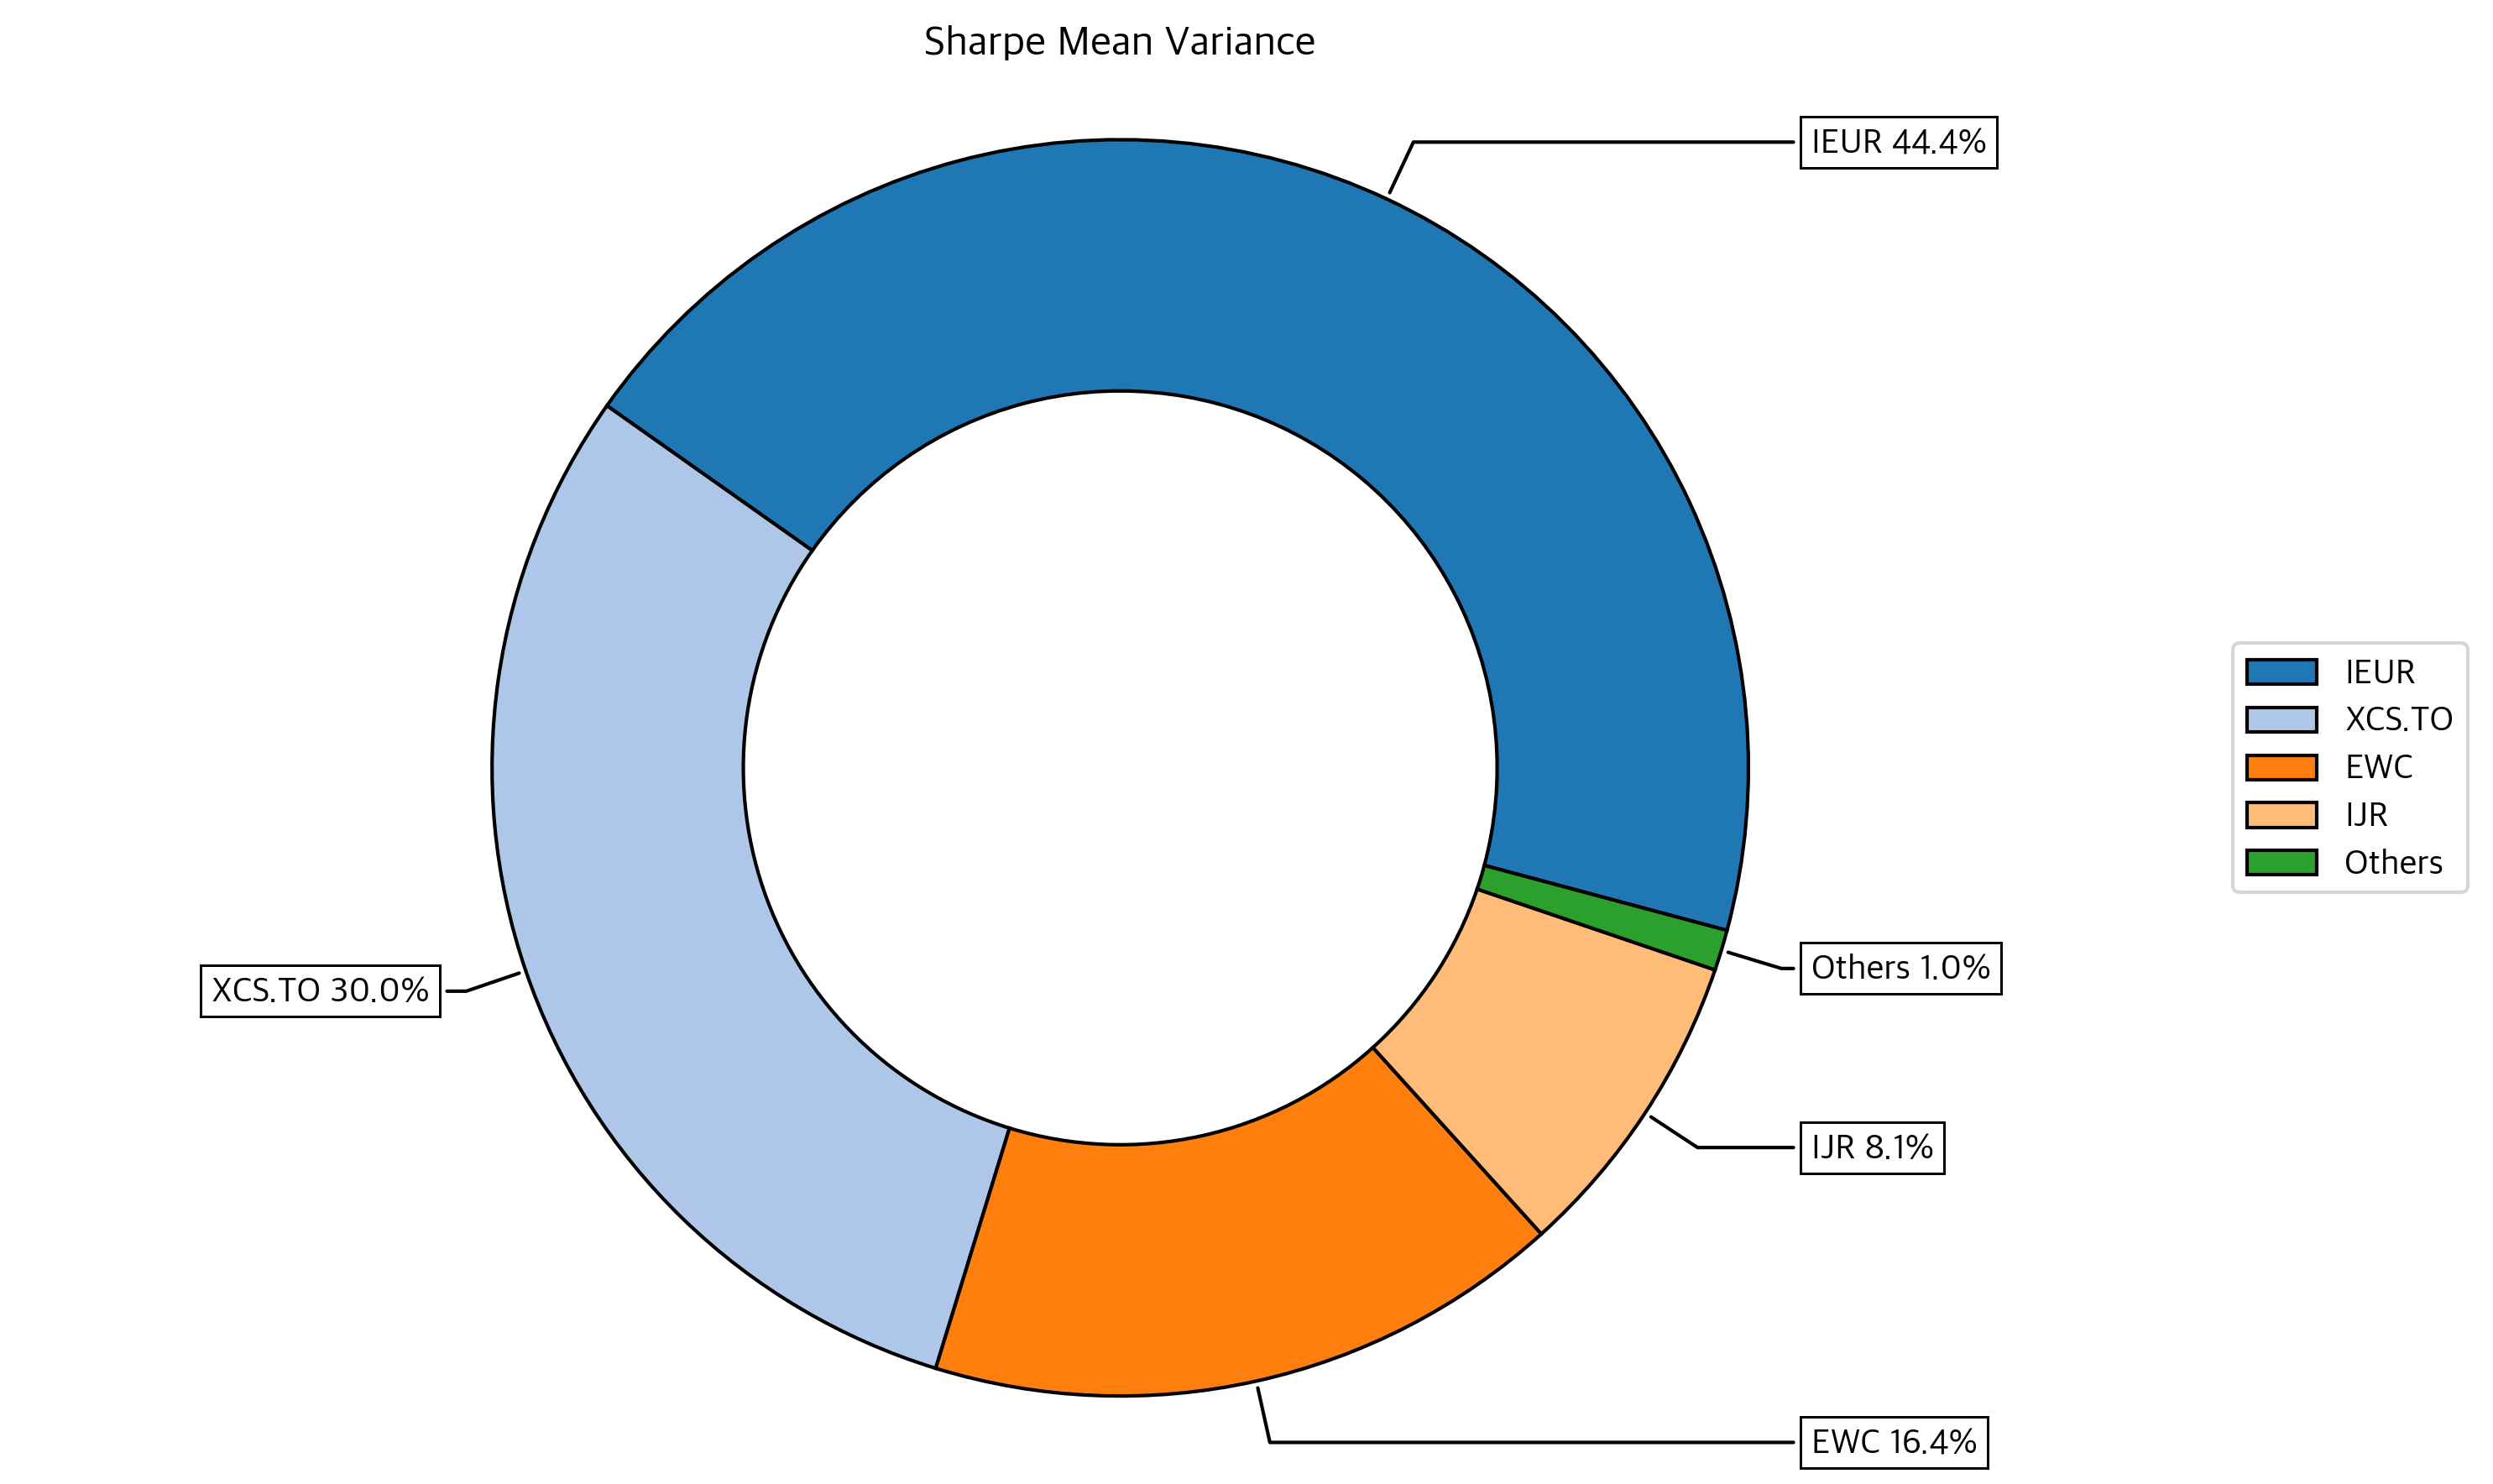

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
0,0.0000%,41.5844%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,58.4156%
1,0.0000%,36.3921%,7.7405%,0.5316%,0.0001%,0.0000%,0.0000%,55.3357%
2,0.0000%,33.5406%,13.0860%,1.6824%,0.0000%,0.0000%,0.0000%,51.6909%
3,0.0000%,31.1301%,17.6221%,2.6522%,0.0000%,0.0000%,0.0000%,48.5956%
4,0.0000%,28.9761%,21.6438%,3.5225%,0.0000%,0.0000%,0.0000%,45.8576%


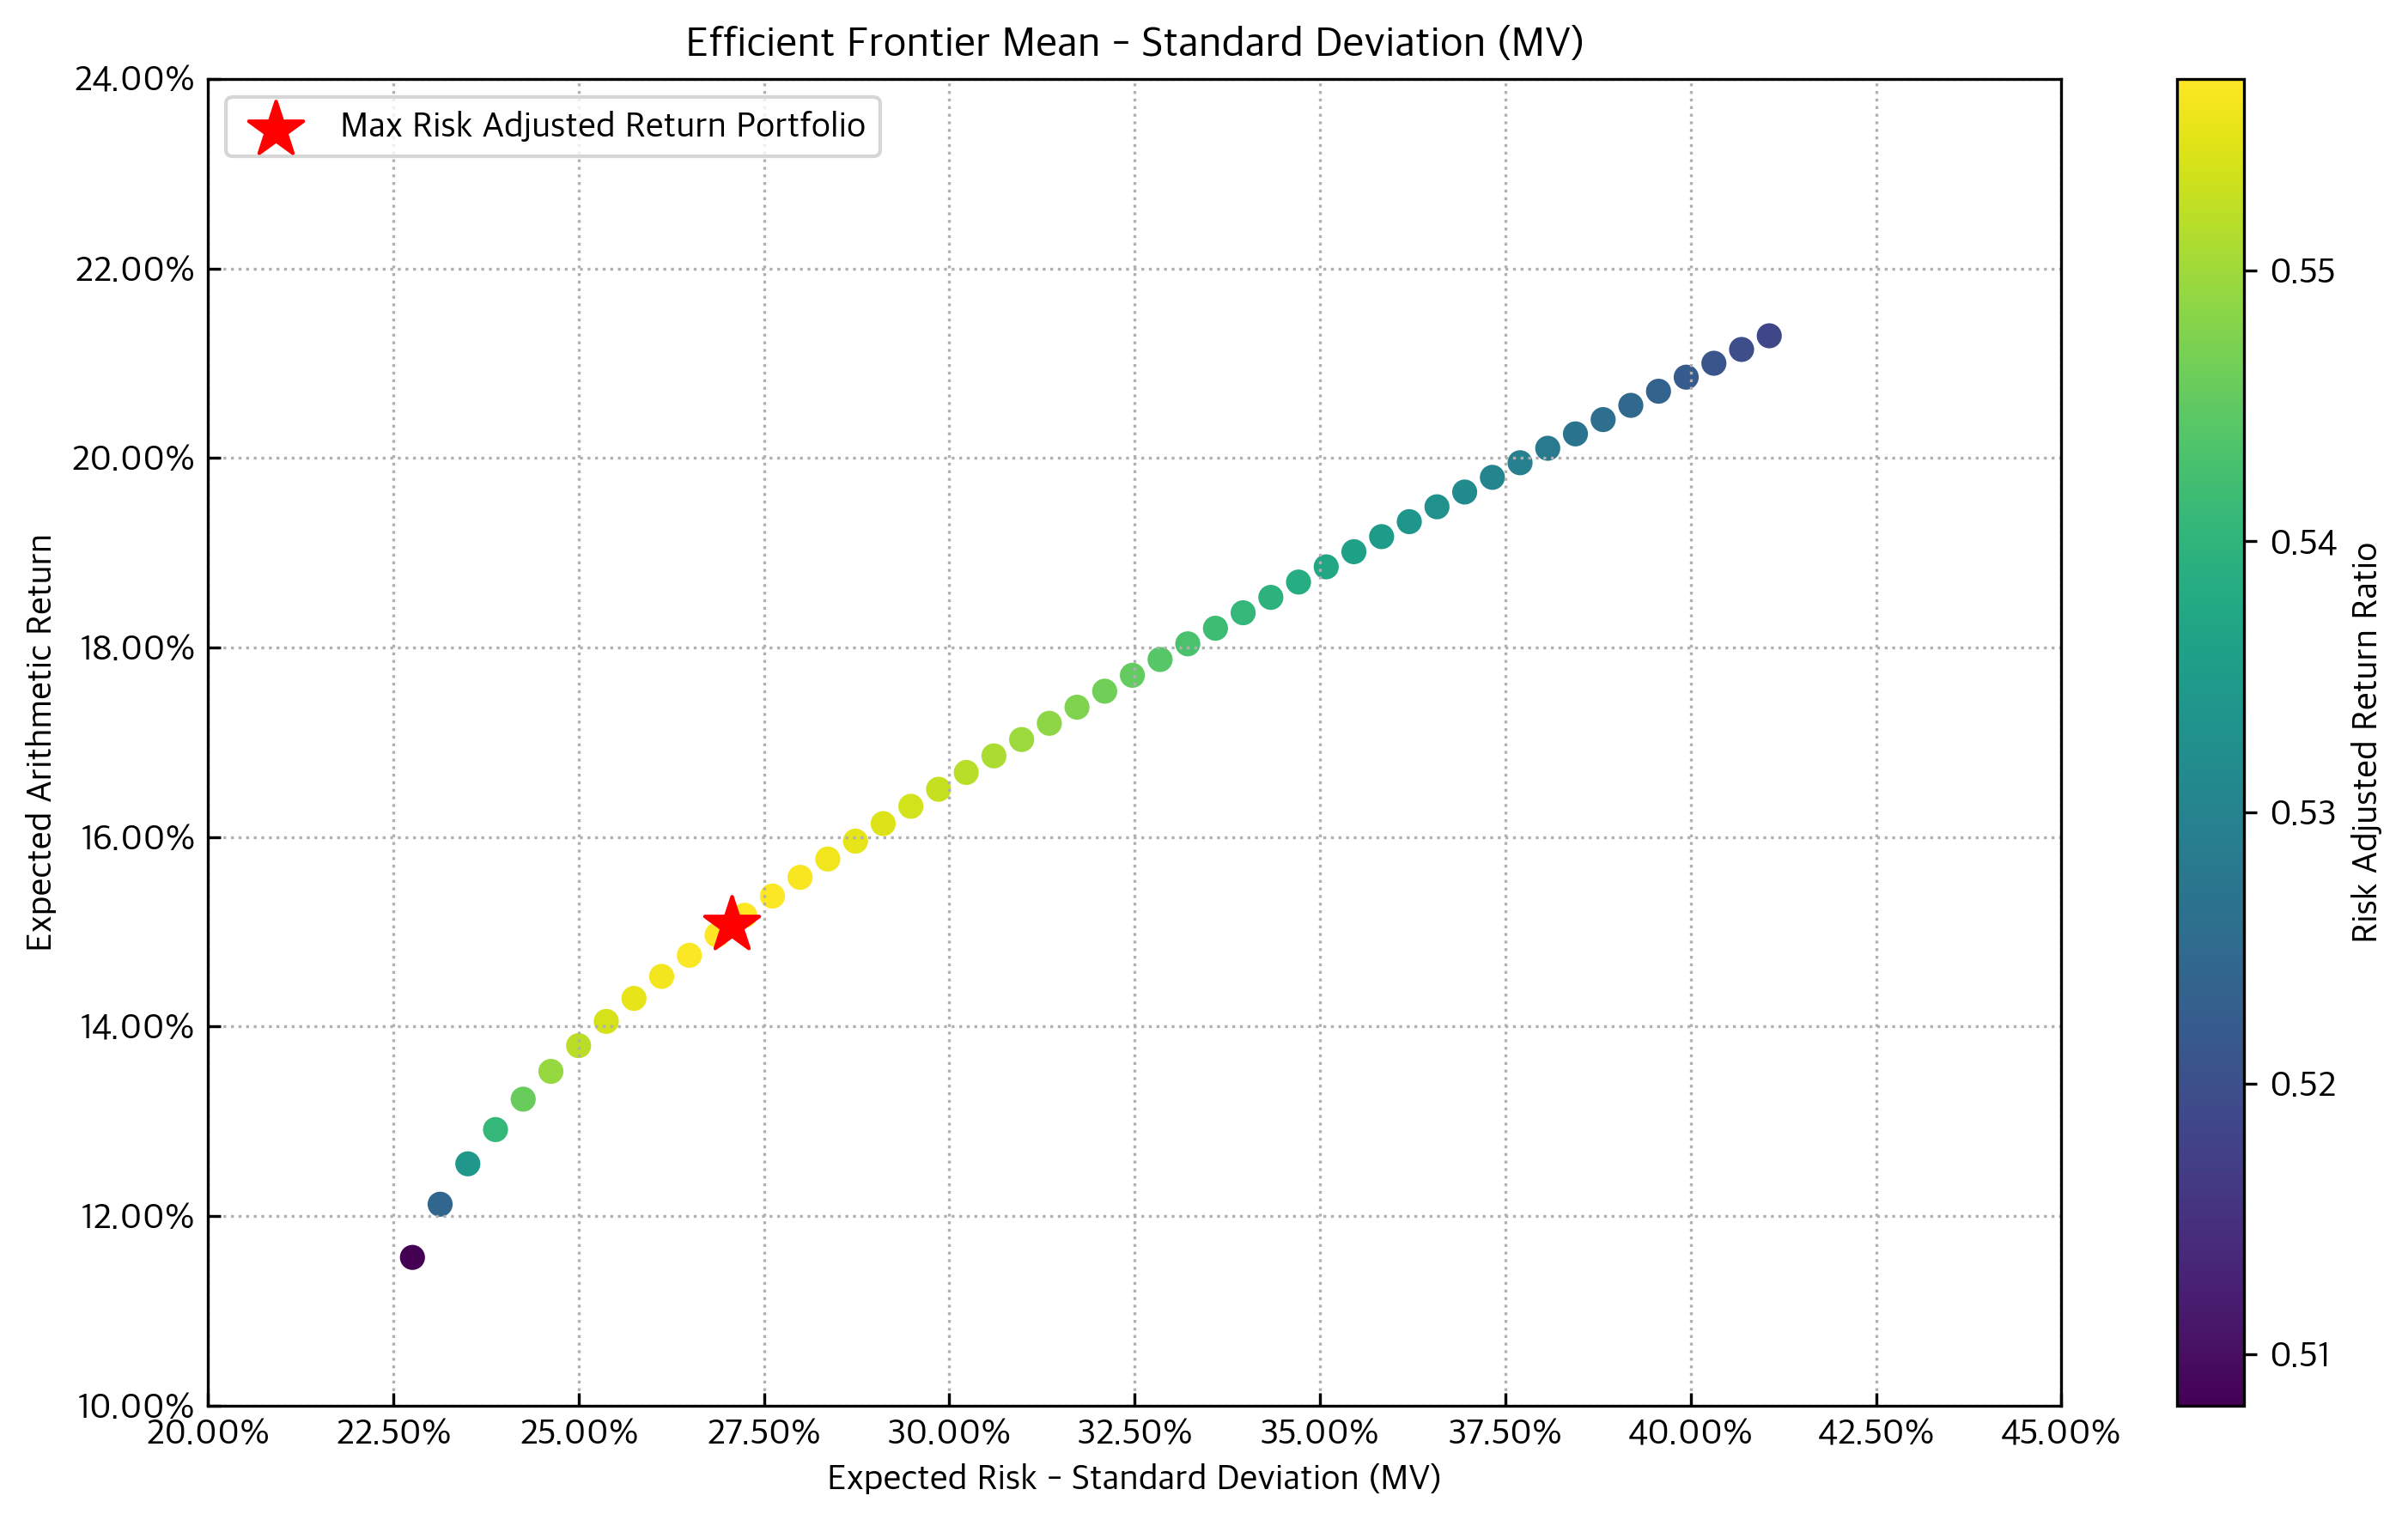

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, t_factor=252, ax=None)

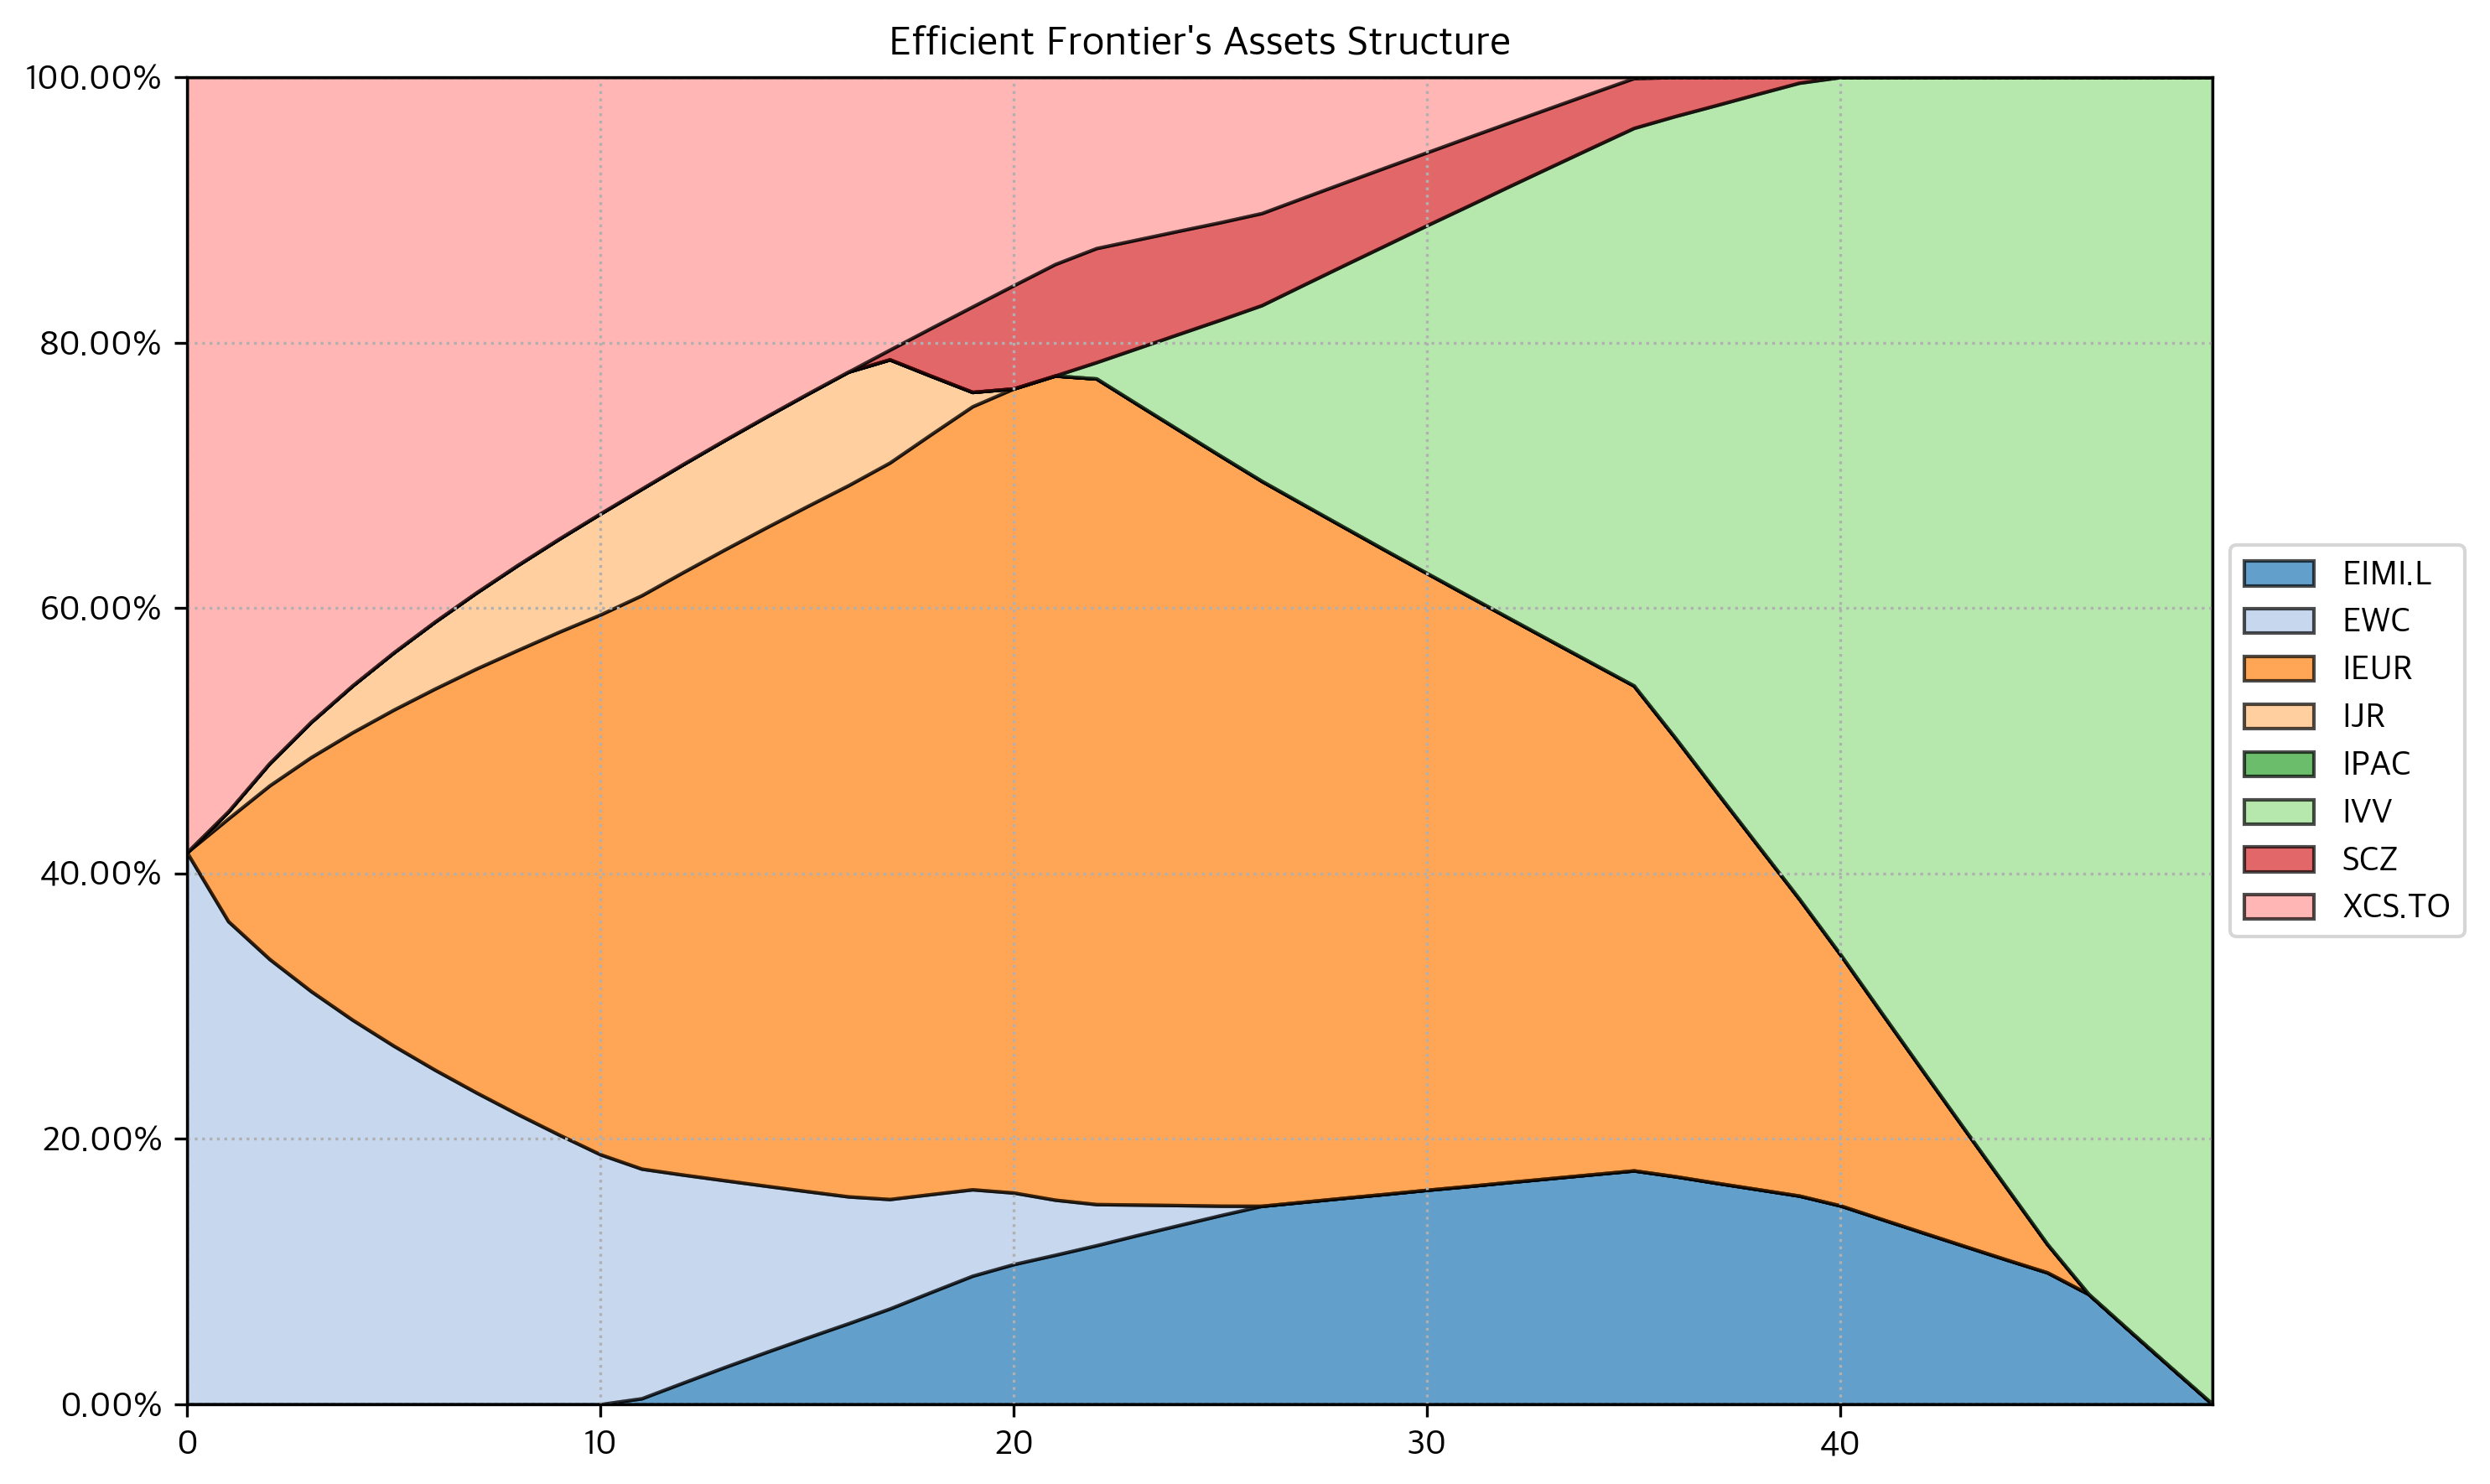

In [8]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Risk Portfolios with Custom Mean Parameter

이 부분에서는 사용자 정의 평균 파라미터를 입력으로 사용하여 여러 리스크 측정 방법에 대한 최적 포트폴리오를 계산할 것입니다. 먼저 CVaR(Conditional Value at Risk)을 리스크 측정 방법으로 사용할 때 리스크 조정 수익을 최대화하는 포트폴리오를 계산하고, 그 다음에는 모든 사용 가능한 리스크 측정 방법에 대해 리스크 조정 수익을 최대화하는 포트폴리오를 계산할 것입니다.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

In [9]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
weights,13.8293%,0.0000%,0.0000%,0.0000%,0.0000%,72.4922%,0.0000%,13.6785%


### 3.2 Plotting portfolio composition

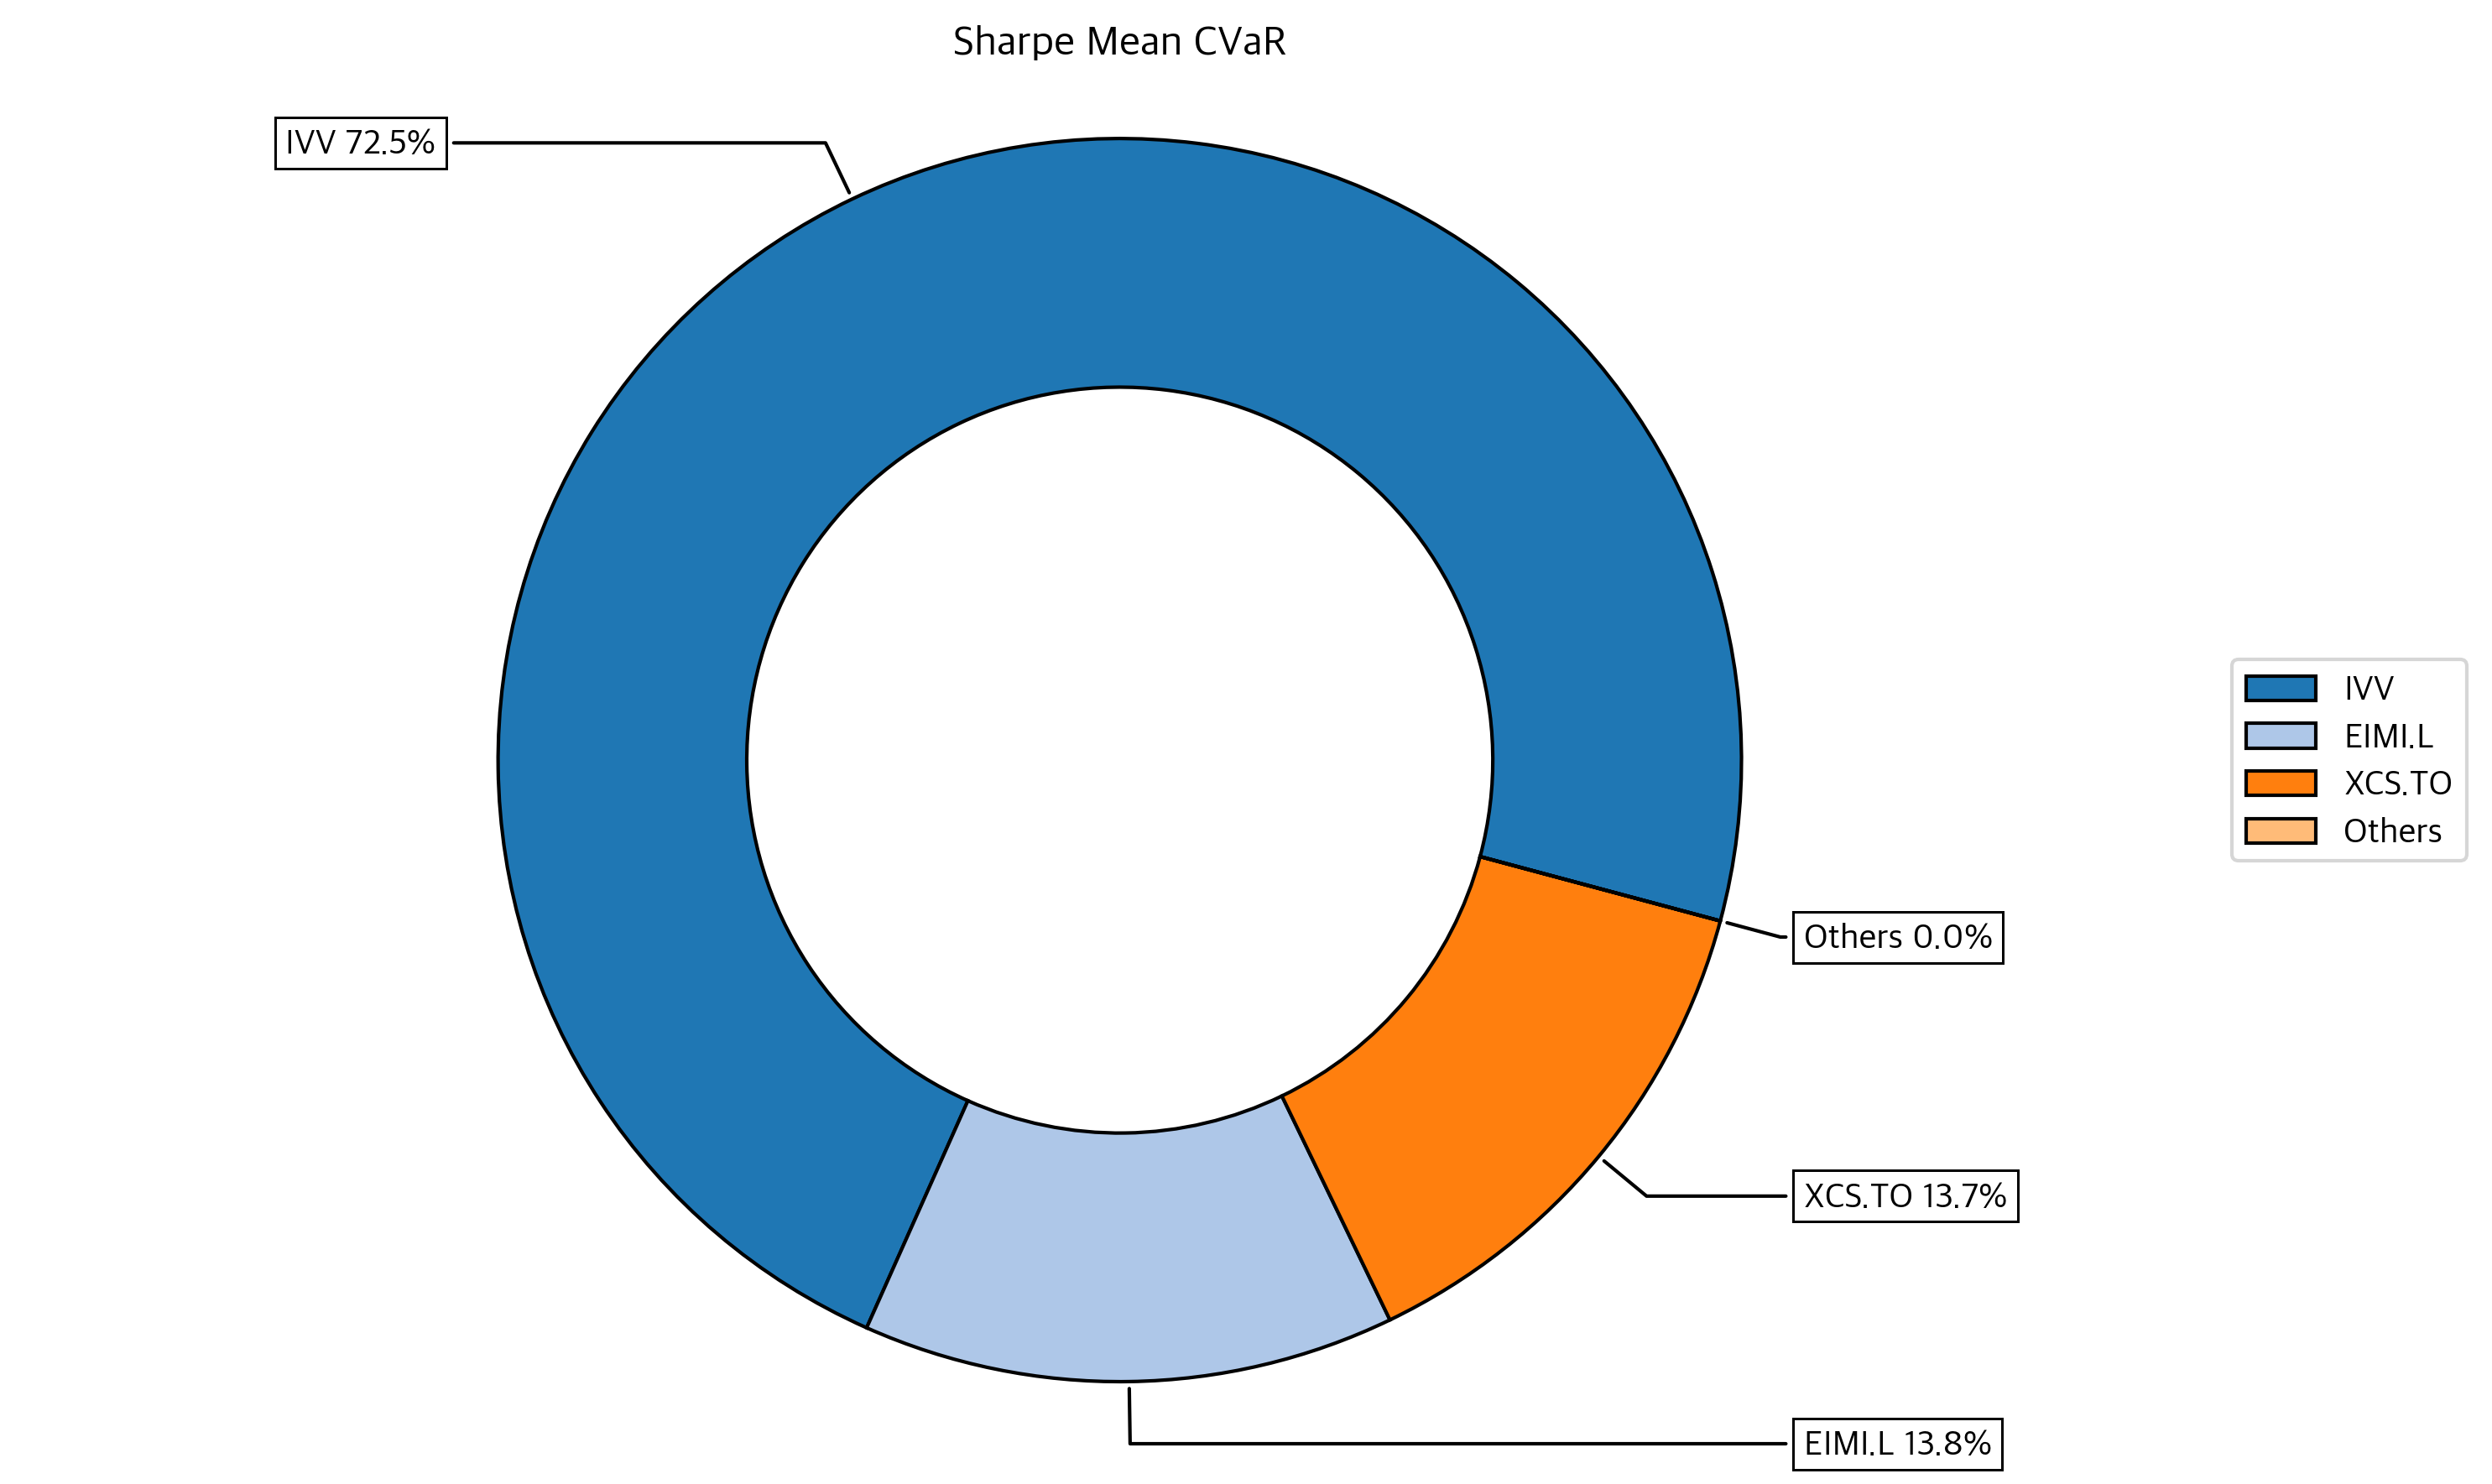

In [10]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [11]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,EIMI.L,EWC,IEUR,IJR,IPAC,IVV,SCZ,XCS.TO
0,15.9784%,0.0000%,0.0000%,0.0000%,34.8883%,8.5750%,0.0000%,40.5582%
1,15.5347%,0.0000%,0.0000%,0.0000%,19.9287%,26.4837%,0.0000%,38.0529%
2,16.0805%,0.0000%,0.0000%,0.0000%,11.5910%,31.9487%,1.8069%,38.5729%
3,14.4224%,0.0000%,0.0000%,0.0000%,4.9181%,32.6309%,10.1858%,37.8427%
4,16.0259%,0.0000%,0.0000%,0.0000%,4.2382%,36.7294%,7.3226%,35.6839%


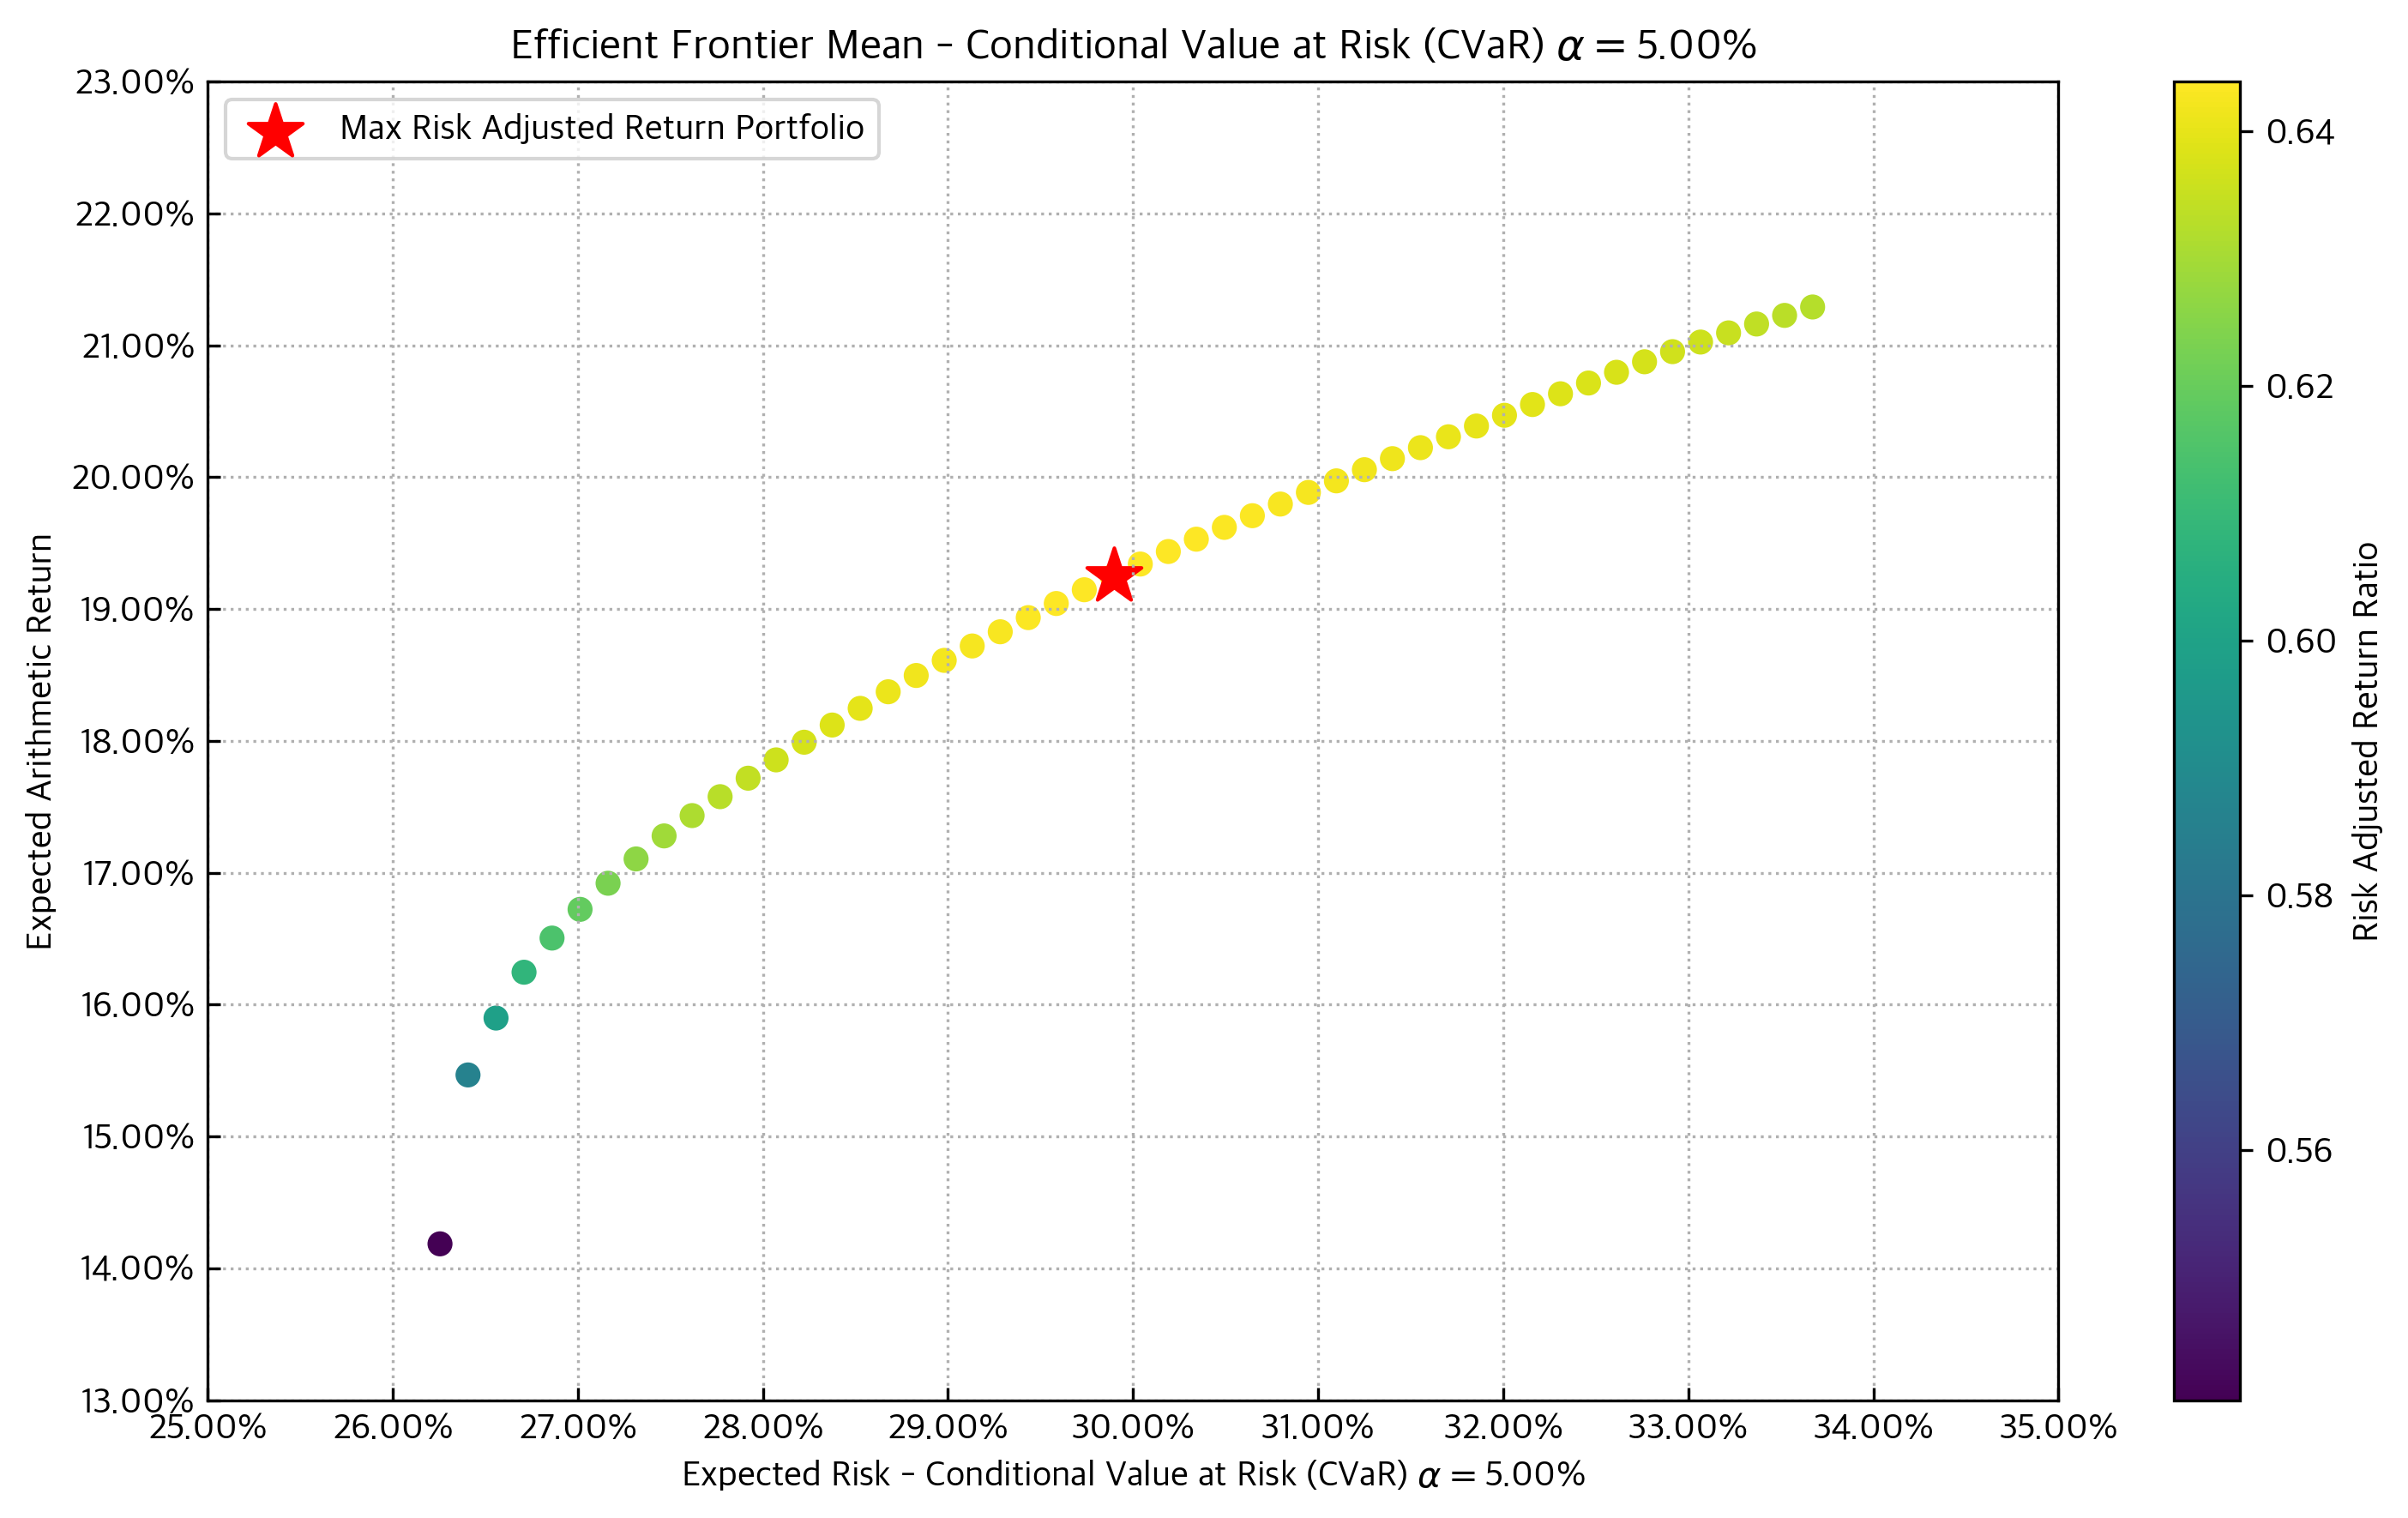

In [12]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, t_factor=252, ax=None)

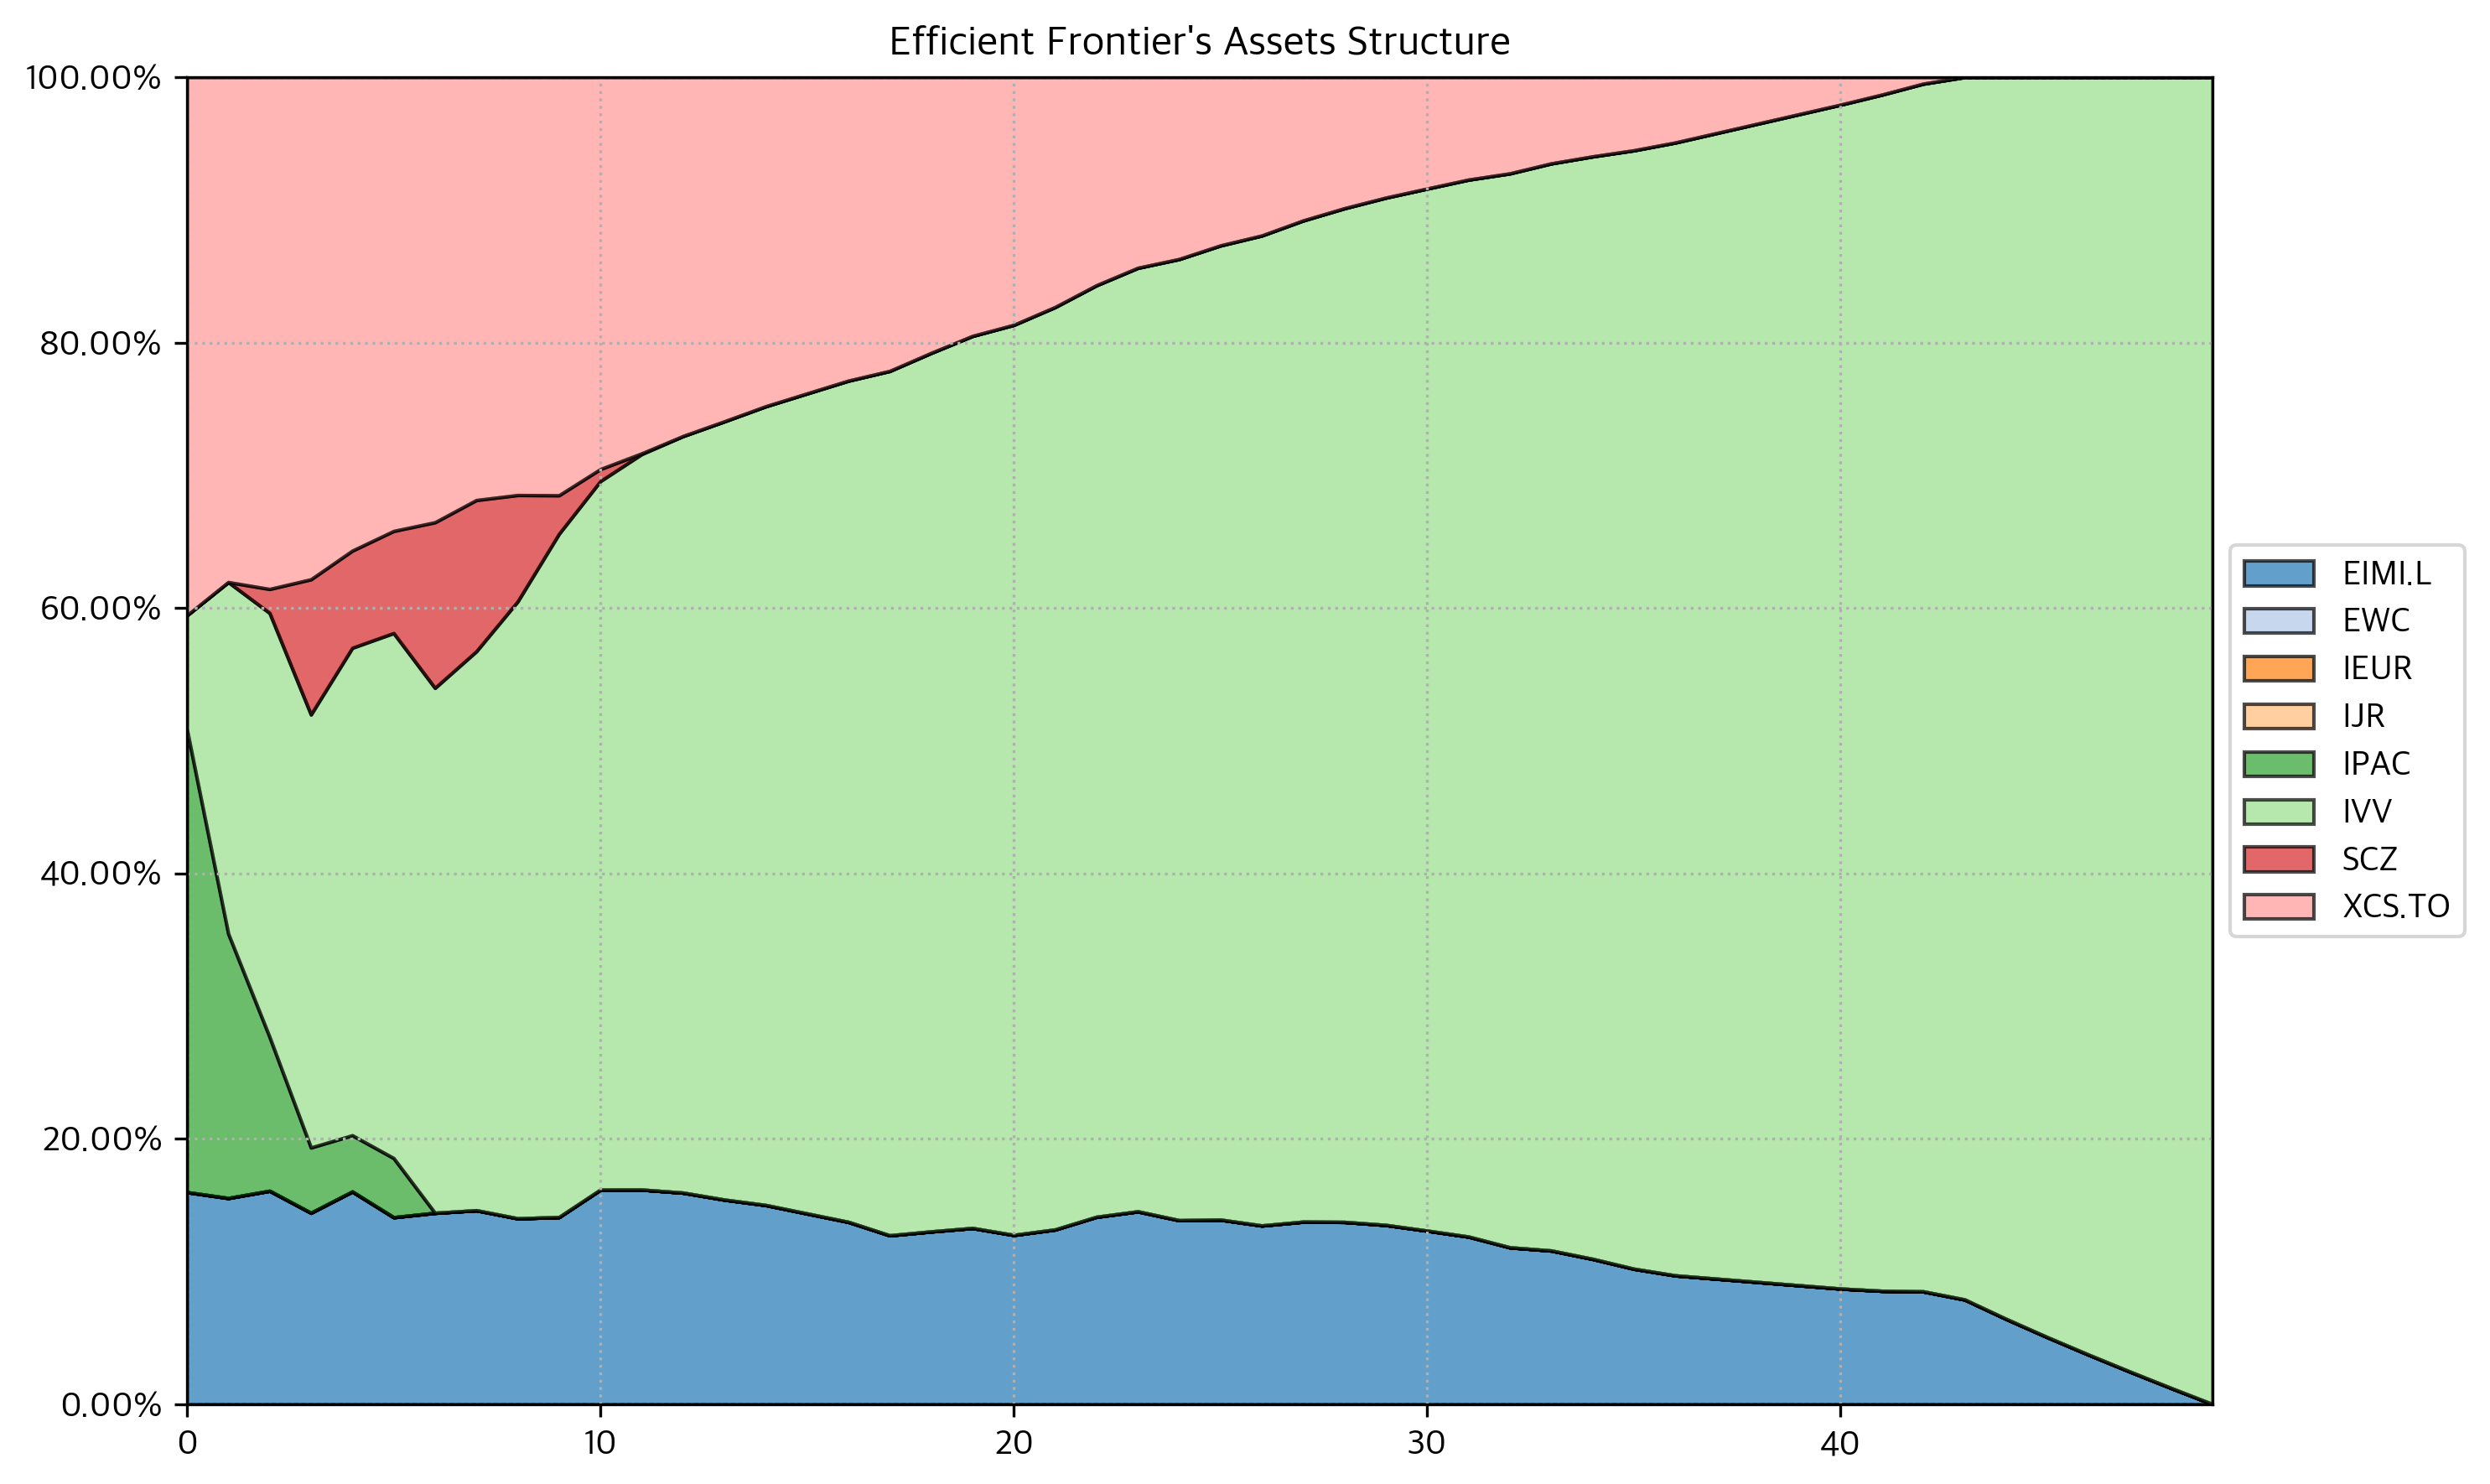

In [13]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [14]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [15]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
EIMI.L,1.05%,0.00%,1.08%,0.00%,1.57%,13.83%,12.07%,0.00%,19.63%,0.00%,19.63%,0.00%,19.63%
EWC,16.44%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
IEUR,44.39%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,9.02%,0.00%,0.00%,0.00%,0.00%,0.00%
IJR,8.09%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
IPAC,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
IVV,0.00%,96.85%,91.22%,99.34%,90.10%,72.49%,58.46%,47.54%,80.37%,100.00%,80.37%,100.00%,80.37%
SCZ,0.00%,1.09%,0.00%,0.03%,0.00%,0.00%,0.00%,1.08%,0.00%,0.00%,0.00%,0.00%,0.00%
XCS.TO,30.03%,2.06%,7.71%,0.63%,8.32%,13.68%,29.47%,42.36%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

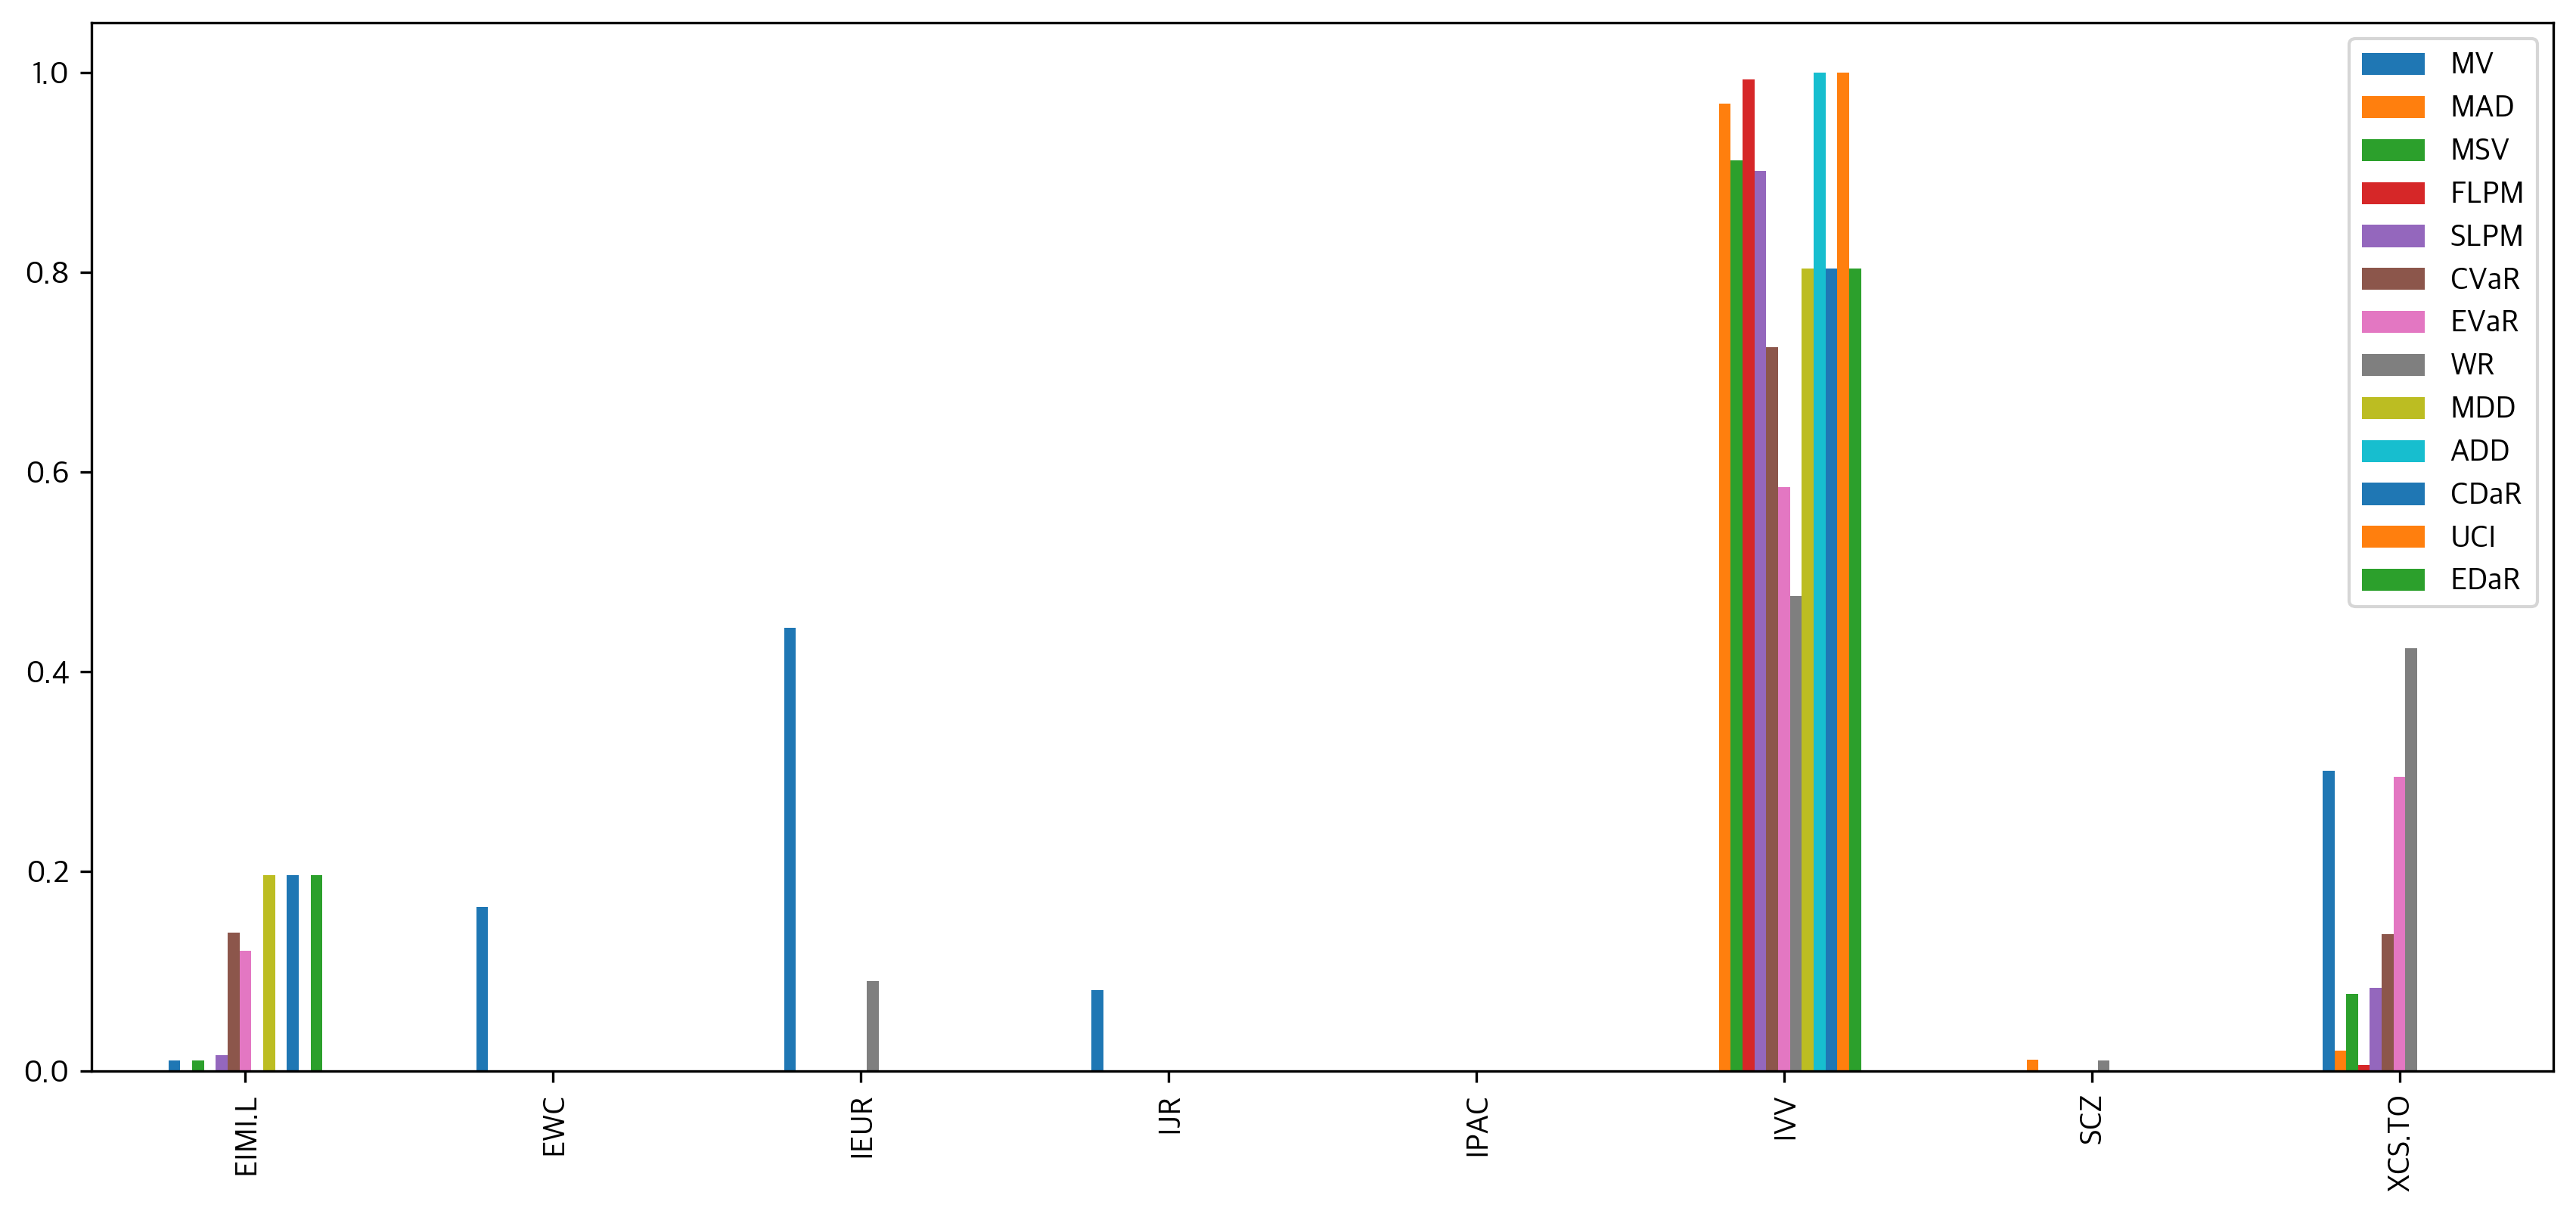

In [16]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)